In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
RANDOM_SEED = 42
EVAL_RESULTS = {}  # for store all the evaluation results

In [36]:
# Load the data
df = pd.read_csv('seeds_dataset.txt', sep="\s+", header=None)
df

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
 7   7       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [38]:
df.describe()

,0,1,2,3,4,5,6,7
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [39]:
# check missing values
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

## **K-MEANS clustering**

In [40]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [41]:
MAX_CLUSTERS = 10

In [42]:
labels = df[7]
features = df.drop(7, axis=1)

**Check class distribution**

In [43]:
from collections import Counter

# Convert to a Counter dictionary
label_counts = Counter(labels)

print(label_counts)

Counter({1: 70, 2: 70, 3: 70})


KMeans is `sensitive to scale`. **NORMALIZE DATA**

In [44]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### **Elbow method**

In [45]:
from sklearn.cluster import KMeans

In [46]:
wcss = []  # Within-Cluster Sum of Square
silhouette_scores = []
for k in range(1, MAX_CLUSTERS + 1):
    if k > 1:  # Silhouette score requires at least 2 clusters
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
        kmeans.fit(scaled_features)
        wcss.append(kmeans.inertia_)
        
        # Calculate silhouette score for k >= 2
        pred_labels = kmeans.labels_
        silhouette_avg = silhouette_score(scaled_features, pred_labels)
        silhouette_scores.append(silhouette_avg)
        print(f'k={k}, WCSS={wcss[-1]}, Silhouette Score={silhouette_scores[-1]}')
    else:
        # For k=1, we can't calculate silhouette score
        wcss.append(kmeans.inertia_ if 'kmeans' in locals() else None)
        silhouette_scores.append(None)

k=2, WCSS=659.1717544870407, Silhouette Score=0.46577247686580914
k=3, WCSS=430.6589731513006, Silhouette Score=0.40072705527512986
k=4, WCSS=371.3017212775421, Silhouette Score=0.32757426605518075
k=5, WCSS=326.5136953844314, Silhouette Score=0.28492975186953856
k=6, WCSS=289.80403698600236, Silhouette Score=0.2797854378466152
k=7, WCSS=262.9736180497327, Silhouette Score=0.2709464554888783
k=8, WCSS=240.6426030504476, Silhouette Score=0.2509742097314636
k=9, WCSS=223.0344239148235, Silhouette Score=0.2570893233860328
k=10, WCSS=204.3165782775962, Silhouette Score=0.25215670078753916


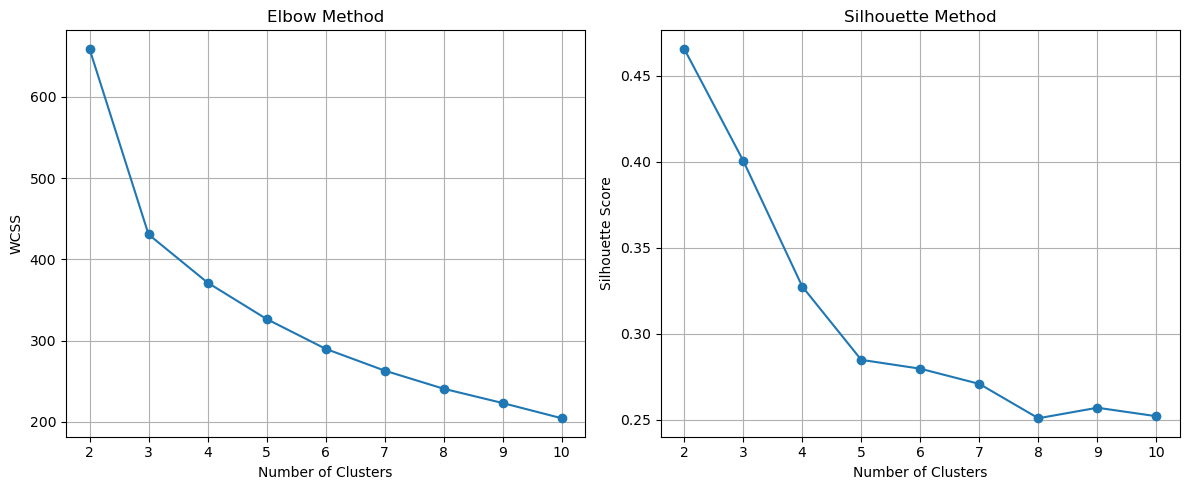

In [47]:
# Plot the Elbow Method graph
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, MAX_CLUSTERS + 1), wcss[1:], marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)

# Plot Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, MAX_CLUSTERS + 1), silhouette_scores[1:], marker='o', linestyle='-')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()


From the Elbow method when `K=3`, there is a clear "elbow" point where the decrease in the within-cluster sum of squares (WCSS) starts to level off

**K=3 KMeans**

In [48]:
kmeans = KMeans(
    n_clusters=3,     # The algorithm will partition the data into 3 clusters.
    init='k-means++', # Uses a smart centroid initialization technique to improve convergence.
    random_state=42,  # Ensures reproducibility; the same seed guarantees consistent results.
    n_init=10         # The algorithm runs 10 times with different initial centroid seeds and picks the best result.
)
kmeans.fit(scaled_features)


KMeans(n_clusters=3, n_init=10, random_state=42)

### **Evaluations**

In [49]:
from evaluation_utils import calculate_classification_metrics, plot_confusion_matrix
from visualization_utils import plot_pca_visualizations, barplot_prediction_correctness
from utils import transform_predictions

In [50]:
# calculate Within-Cluster Sum of Squares (WCSS)
kmeans_wcss = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(scaled_features, kmeans.labels_)

print(f"Within-Cluster Sum of Squares (WCSS): {kmeans_wcss}")
print(f"Silhouette Score: {kmeans_silhouette_score}")

Within-Cluster Sum of Squares (WCSS): 430.6589731513006
Silhouette Score: 0.40072705527512986


In [51]:
pred = kmeans.predict(scaled_features)
y_true = labels

In [52]:
# KMeans predicted label values and true label values should be mapped correctly

# Replace values (2→1, 0→3, 1→2)
pred2 = transform_predictions(pred)

print("Original array:", pred)
print("Modified array:", pred2)

Original array: [2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 2 2 2 2 2 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 2 1 2 2 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0]
Modified array: [1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 1 3 1 1 1 1 1 3 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 1 1 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 1 3 3 3 3 3 3 3 3]


In [53]:
kmeans_classification_metrics = calculate_classification_metrics(y_true, pred2)

              precision    recall  f1-score   support

           1       0.87      0.89      0.88        70
           2       0.97      0.93      0.95        70
           3       0.92      0.94      0.93        70

    accuracy                           0.92       210
   macro avg       0.92      0.92      0.92       210
weighted avg       0.92      0.92      0.92       210

Accuracy: 0.9190
Confusion Matrix:
[[62  2  6]
 [ 5 65  0]
 [ 4  0 66]]
F1 Score: 0.9193
Precision: 0.9200
Recall: 0.9190
Purity Score: 0.9190


In [54]:
# Add results to 'EVAL_RESULTS'
EVAL_RESULTS['KMeans'] = {'Silhouette Score': kmeans_silhouette_score,
        'Accuracy': kmeans_classification_metrics['accuracy'],
        'Precision': kmeans_classification_metrics['precision'],
        'Recall': kmeans_classification_metrics['recall'],
        'F1 Score': kmeans_classification_metrics['f1_score'],
        'Purity Score': kmeans_classification_metrics['purity']}

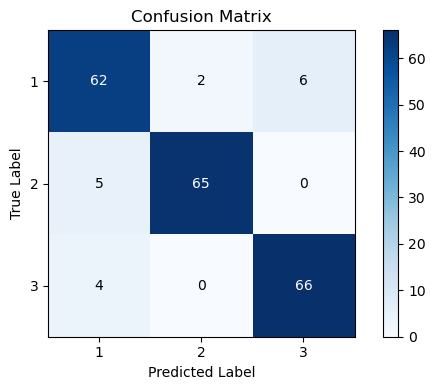

In [55]:
plot_confusion_matrix(y_true, pred2)

(<Figure size 1000x500 with 2 Axes>, PCA(n_components=2))

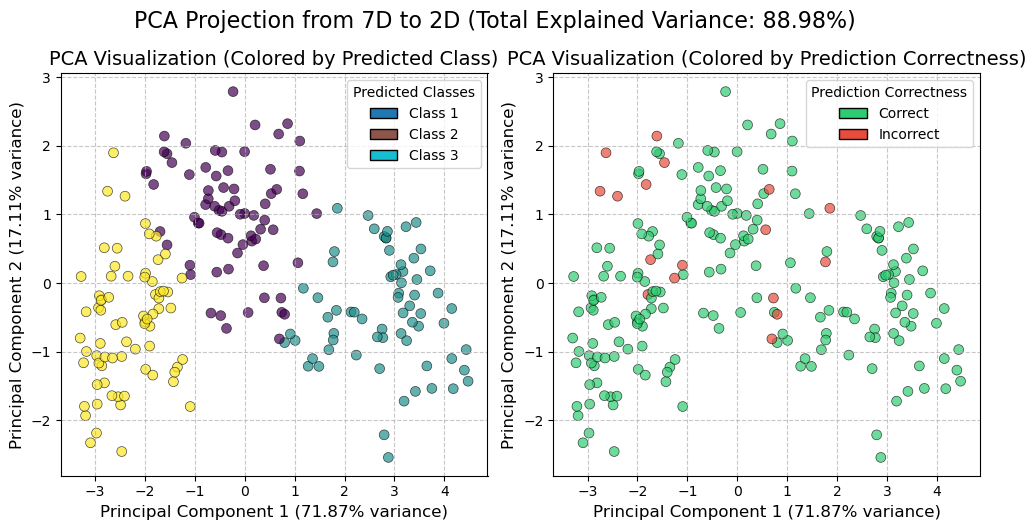

In [56]:
LABELS = [1, 2, 3]
plot_pca_visualizations(features, y_true, pred2, class_labels=LABELS)

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Correct vs. Incorrect Predictions per Actual Label'}, xlabel='Actual Label', ylabel='Count'>)

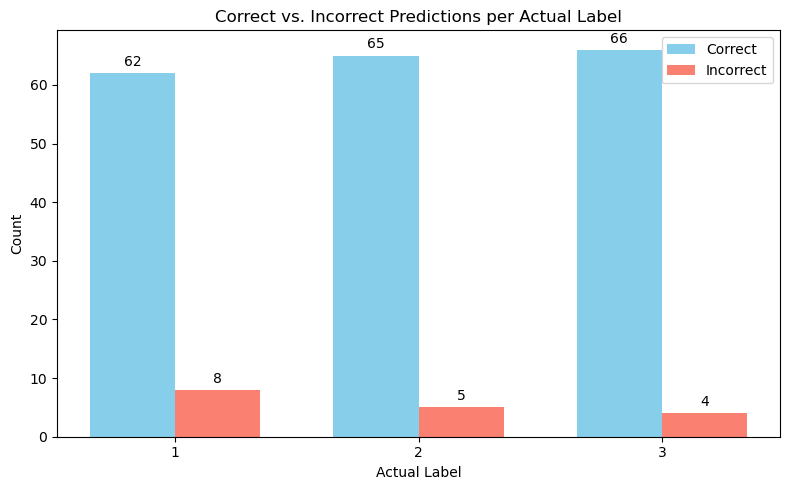

In [57]:
barplot_prediction_correctness(y_true, pred2, labels=LABELS)

## **Agglomerative Hierarchical Clustering**

In [58]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [59]:
def plot_dendrogram(X: np.ndarray, method: str = 'ward', 
                   title: str = 'Hierarchical Clustering Dendrogram',
                   figsize: tuple = (12, 8), 
                   color_threshold: float = None,
                   leaf_font_size: int = 10) -> plt.Figure:
    """
    Plot the dendrogram for hierarchical clustering.
    
    Parameters:
    -----------
    X : Feature matrix of shape (n_samples, n_features)
    method : Linkage method to use. Options: 'single', 'complete', 'average', 'ward'
    title : Plot title
    figsize : Figure size as (width, height) in inches
    color_threshold : Threshold for coloring clusters in the dendrogram
    leaf_font_size : Font size for the leaf labels
        
    Returns:
    --------
    fig : The created figure object
    """
    # Create figure
    fig = plt.figure(figsize=figsize)
    
    # Create linkage matrix
    Z = linkage(X, method=method)
    
    # Plot dendrogram
    dendrogram(
        Z,
        leaf_font_size=leaf_font_size,
        color_threshold=color_threshold
    )
    
    plt.title(title)
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.tight_layout()
    
    return fig


def hierarchical_clustering(X: np.ndarray, n_clusters: int = 3, 
                           linkage_method: str = 'ward',
                           compute_full_tree: bool = False) -> tuple:
    """
    Perform hierarchical clustering with specified parameters.
    
    Parameters:
    -----------
    X : Feature matrix of shape (n_samples, n_features)
    n_clusters : Number of clusters to find
    linkage_method : Linkage method to use. Options: 'ward', 'complete', 'average', 'single'
    affinity : Metric used to compute the linkage. Options depend on the linkage method
    compute_full_tree : Whether to compute the full tree or stop at n_clusters
        
    Returns:
    --------
    model : Fitted clustering model
    clusters : Cluster assignments for each sample
    silhouette : Silhouette score for the clustering result
    """
    # Initialize model
    model = AgglomerativeClustering(
        n_clusters=n_clusters,
        linkage=linkage_method,
        compute_distances=True,  # Required for visualizing distances
        compute_full_tree=compute_full_tree,
    )
    
    # Fit model and predict clusters
    clusters = model.fit_predict(X)

    # Calculate silhouette score if we have more than one cluster
    if n_clusters > 1:
        silhouette = silhouette_score(X, clusters)
    else:
        silhouette = None
    
    return model, clusters, silhouette


def plot_clusters(X: np.ndarray, cluster_labels: np.ndarray, 
                 plot_title: str = 'Cluster Assignments',
                 feature_names: tuple = None,
                 figsize: tuple = (6, 4),
                 marker_size: int = 50,
                 alpha: float = 0.8,
                 cmap: str = 'viridis',
                 add_legend: bool = True,
                 plot_dimensions: tuple = (0, 1)) -> plt.Figure:
    """
    Plot cluster assignments in a 2D scatter plot.
    
    Parameters:
    -----------
    X : Feature matrix of shape (n_samples, n_features)
    cluster_labels : Cluster assignments for each sample
    plot_title : Plot title
    feature_names : Names of the features to use as axis labels
    figsize : Figure size as (width, height) in inches
    marker_size : Size of the scatter plot markers
    alpha : Transparency of markers (0 to 1)
    cmap : Colormap to use for cluster visualization
    add_legend : Whether to add a legend with cluster counts
    plot_dimensions : Indices of the features to plot on x and y axes
        
    Returns:
    --------
    fig : The created figure object
    """
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Extract dimensions to plot
    dim1, dim2 = plot_dimensions
    
    # Check if X has enough dimensions
    if X.shape[1] <= max(dim1, dim2):
        raise ValueError(f"X has only {X.shape[1]} features, but plot_dimensions={plot_dimensions}")
    
    # Plot clusters
    scatter = ax.scatter(
        X[:, dim1], X[:, dim2], 
        c=cluster_labels, 
        cmap=cmap, 
        s=marker_size, 
        alpha=alpha
    )
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Cluster')
    
    # Set title and labels
    ax.set_title(plot_title)
    
    # Use feature names if provided, otherwise use generic labels
    if feature_names and len(feature_names) > max(dim1, dim2):
        ax.set_xlabel(feature_names[dim1])
        ax.set_ylabel(feature_names[dim2])
    else:
        ax.set_xlabel(f'Feature {dim1}')
        ax.set_ylabel(f'Feature {dim2}')
    
    # Add legend with cluster counts if requested
    if add_legend:
        unique_clusters = np.unique(cluster_labels)
        cluster_counts = [sum(cluster_labels == c) for c in unique_clusters]
        legend_labels = [f'Cluster {c}: {count} samples' for c, count in zip(unique_clusters, cluster_counts)]
        
        # Add a legend with cluster information
        handles = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor=scatter.cmap(scatter.norm(c)), 
                             markersize=10) 
                  for c in unique_clusters]
        ax.legend(handles, legend_labels, title="Clusters", loc='best')
    
    plt.tight_layout()
    return fig

**Single Linkage (Silhouette: -0.006)**
**Complete Linkage (Silhouette: 0.350)**
**Average Linkage (Silhouette: 0.376)**
**Ward Linkage (Silhouette: 0.393)**


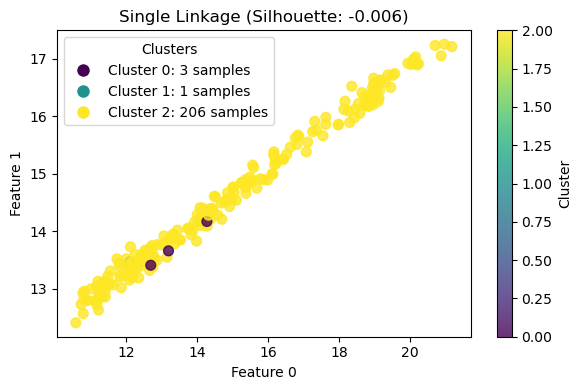

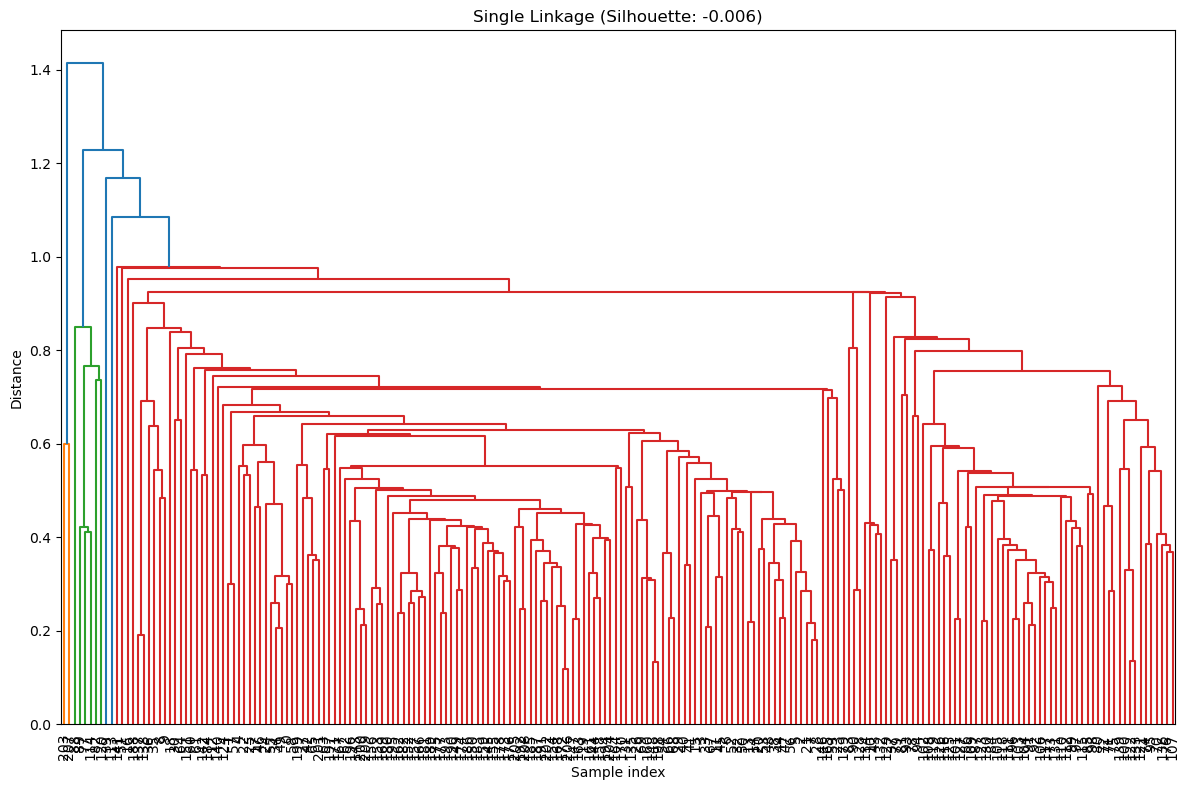

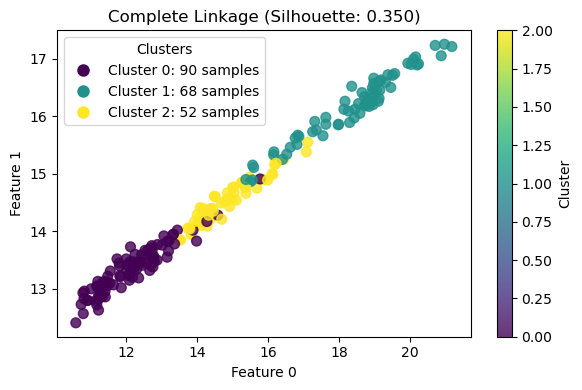

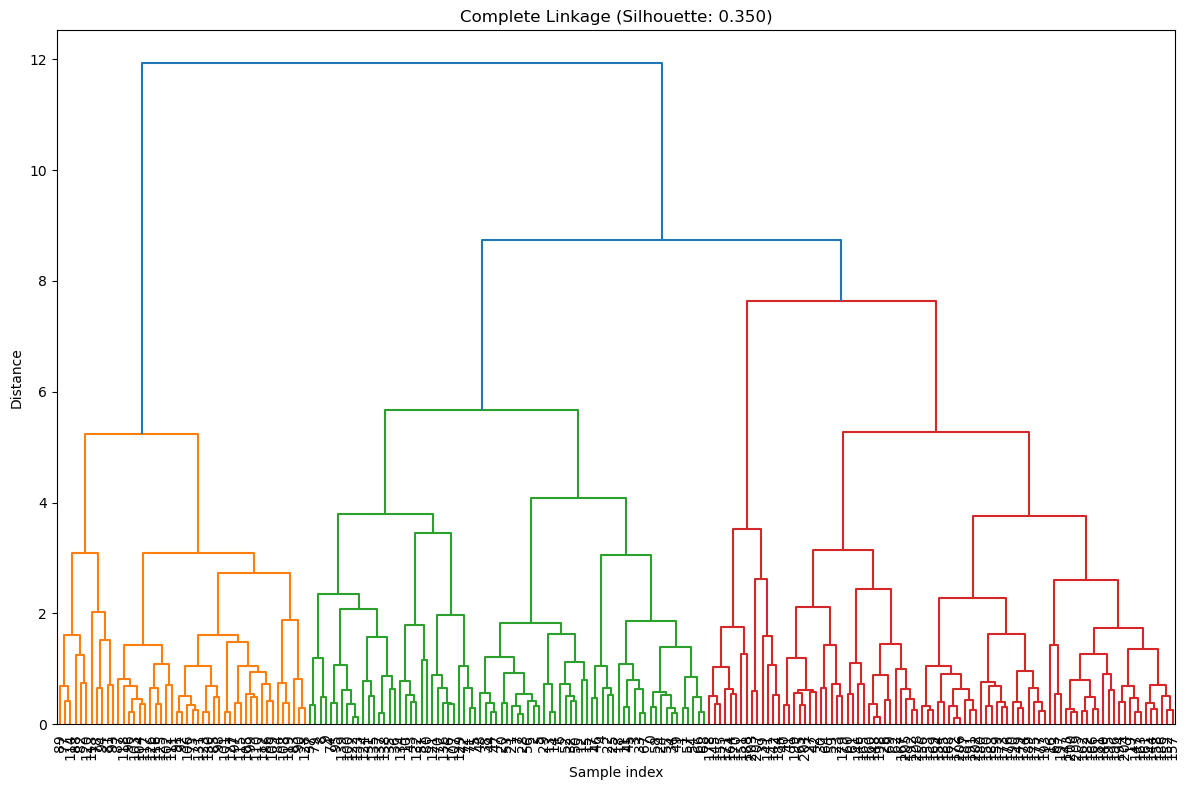

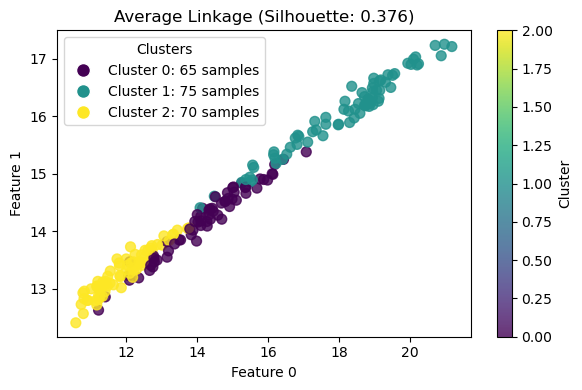

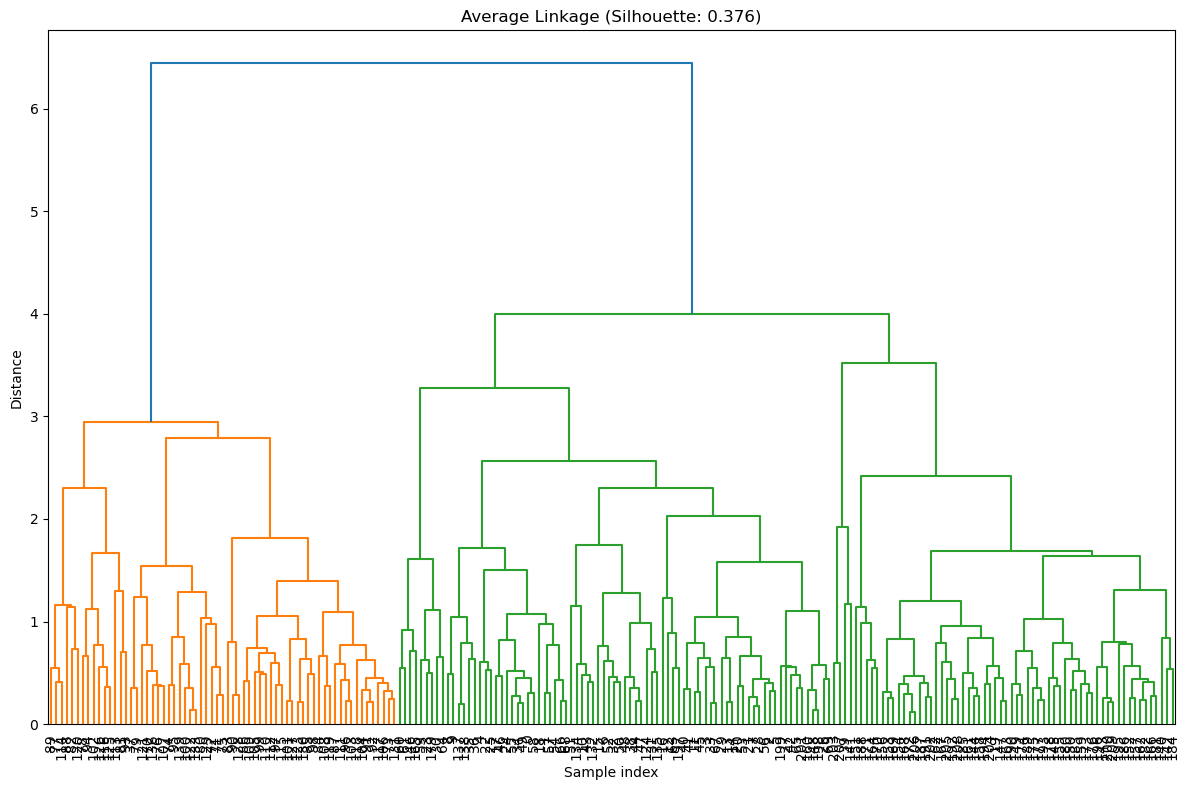

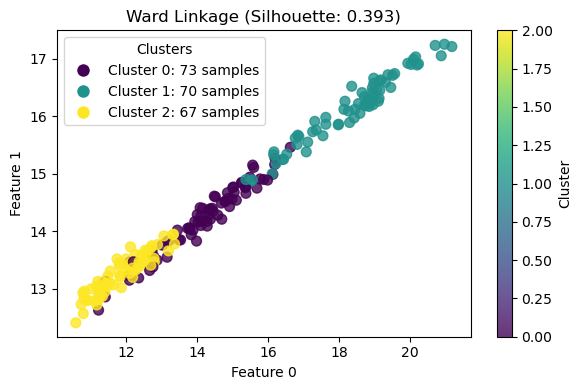

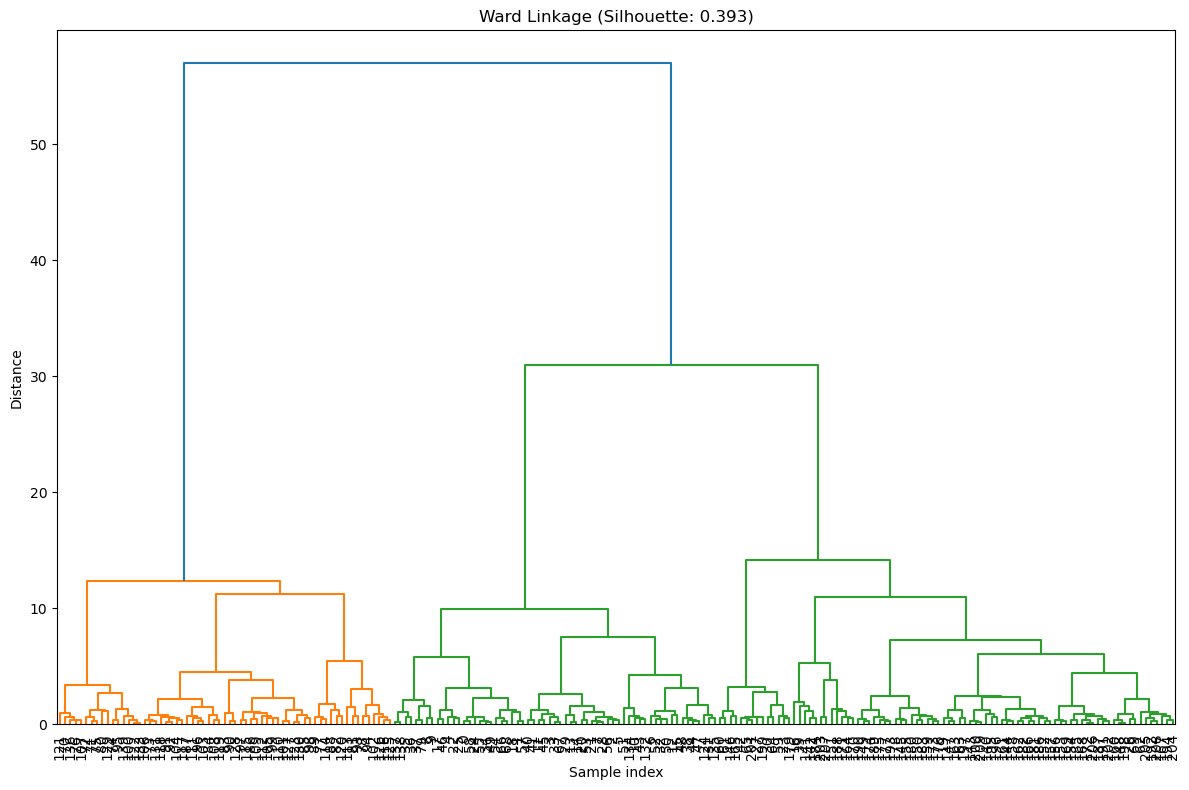

In [60]:
LINKAGE_METHODS = ['single', 'complete', 'average', 'ward']
N_CLUSTERS = 3

for linkage_method in LINKAGE_METHODS:
    model, y_pred, silhouette = hierarchical_clustering(scaled_features, N_CLUSTERS, linkage_method)
    # print(clusters)

    plot_title = f"{linkage_method.capitalize()} Linkage (Silhouette: {silhouette:.3f})"
    print(f'**{plot_title}**')

    plot_clusters(features.values, y_pred, plot_title)
    plot_dendrogram(features, method=linkage_method, title=plot_title)

    # Evaluation
    evaluation_results = calculate_classification_metrics(y_true, pred2, False)
    scores_dict = {
        'Silhouette Score': silhouette,
        'Purity Score': evaluation_results['purity']
    }

    EVAL_RESULTS[f"{linkage_method}_Agglomerative"] = scores_dict


## **k-mediods**

              precision    recall  f1-score   support

           1       0.80      0.91      0.85        70
           2       0.97      0.89      0.93        70
           3       0.94      0.89      0.91        70

    accuracy                           0.90       210
   macro avg       0.90      0.90      0.90       210
weighted avg       0.90      0.90      0.90       210

Accuracy: 0.8952
Confusion Matrix:
[[64  2  4]
 [ 8 62  0]
 [ 8  0 62]]
F1 Score: 0.8968
Precision: 0.9027
Recall: 0.8952
Purity Score: 0.8952


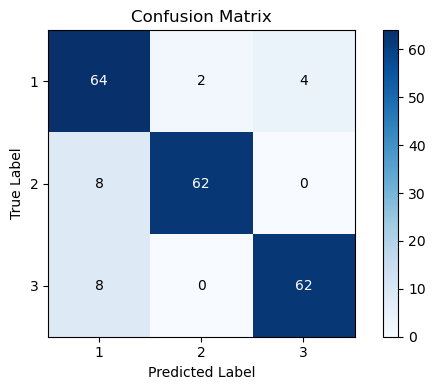

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Correct vs. Incorrect Predictions per Actual Label'}, xlabel='Actual Label', ylabel='Count'>)

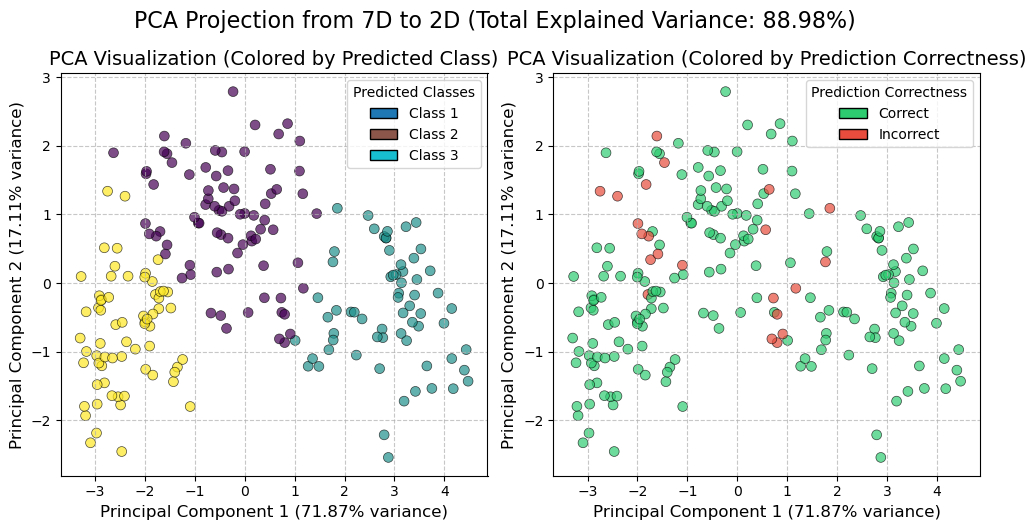

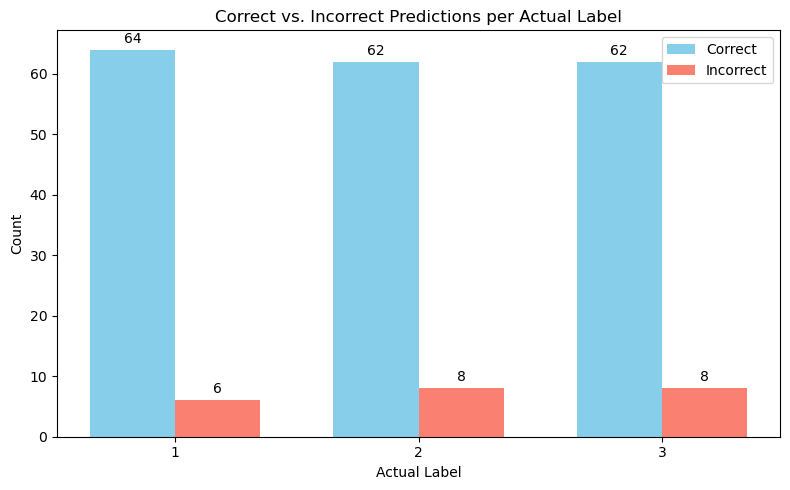

In [61]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=N_CLUSTERS, random_state=RANDOM_SEED)

# Fit the model
kmedoids.fit(scaled_features)

pred = kmedoids.labels_

kmedoids_silhouette_score = silhouette_score(scaled_features, pred)
pred2 = transform_predictions(pred, {0:1, 2:2, 1:3})

kmedoids_classification_metrics = calculate_classification_metrics(y_true, pred2)


# Add results to 'EVAL_RESULTS'
EVAL_RESULTS['Kmedoids'] = {'Silhouette Score': kmedoids_silhouette_score,
        'Accuracy': kmedoids_classification_metrics['accuracy'],
        'Precision': kmedoids_classification_metrics['precision'],
        'Recall': kmedoids_classification_metrics['recall'],
        'F1 Score': kmedoids_classification_metrics['f1_score'],
        'Purity Score': kmedoids_classification_metrics['purity']}

plot_confusion_matrix(y_true, pred2)

plot_pca_visualizations(features, y_true, pred2, class_labels=LABELS)
barplot_prediction_correctness(y_true, pred2, labels=LABELS)

In [62]:
results_df = pd.DataFrame(EVAL_RESULTS)
results_df

,KMeans,single_Agglomerative,complete_Agglomerative,average_Agglomerative,ward_Agglomerative,Kmedoids
Silhouette Score,0.400727,-0.005642,0.350198,0.375957,0.392634,0.399208
Accuracy,0.919048,NaN,NaN,NaN,NaN,0.895238
Precision,0.920018,NaN,NaN,NaN,NaN,0.902715
Recall,0.919048,NaN,NaN,NaN,NaN,0.895238
F1 Score,0.919305,NaN,NaN,NaN,NaN,0.896824
Purity Score,0.919048,0.919048,0.919048,0.919048,0.919048,0.895238
